###

In [1]:
import os

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
model = "deepseek-r1-distill-llama-70b"

In [6]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model_name = model,
    temperature = 0
)

response = llm.invoke("What is the Length of the Wall of China?")

In [7]:
response.content

"<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's measured in thousands of kilometers, but I'm not certain about the exact number. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or something like that, but I'm not sure if that's accurate.\n\nI think the wall was constructed to protect the Chinese Empire from invasions, so it must have been built in segments over time. Each dynasty probably added their own sections, which might not all be connected. That could explain why measuring the total length is tricky.\n\nI remember reading somewhere that the exact length isn't known because some parts are in ruins or have disappeared. So, maybe the numbers I've heard are 

In [8]:
from langchain_groq import ChatGroq

In [9]:
from langchain.tools import tool

In [16]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

#### Importing the inbuit Tool

In [12]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()  #duck Duck Go  will give summmary 

In [14]:
search.invoke("What is the Latest Update on the Iphone17 Release?")

'In April, Majin Bu reported that the iPhone 17 Pro models will come in a new and "irresistible" sky blue color. That would be the second product with that color, following the M4 MacBook Air. Today: an iPhone-centric roundup of iPhone 17, 18, and Fold rumors, plus the latest M5 iPad Pro update. Here are this week\'s Apple rumors. All the latest iPhone 17 updates Planned for September 2025, the iPhone 17 models could feature larger display sizes, ProMotion across the lineup, Wi-Fi 7, and more. We\'re still a few months away from the debut of the iPhone 17 ... New iPhone 17 colors. Rumors of a new color for the iPhone started in April, when Twitter user and leaker Majin Bu (not the Dragon Ball Z character) posted that the iPhone 17 Pro and Pro Max could ... The iPhone 17 series is shaping up to be an evolutionary update, focusing on refining existing features rather than introducing innovative changes. Recent leaks indicate that Apple is prioritizing ...'

In [ ]:
tools = [multiply,add,divide,search] #4 Tools

In [18]:
#Binding the Tools with LLM
llm_with_tools = llm.bind_tools(tools)

In [19]:
llm_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000292D8471910>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000292D87269C0>, model_name='deepseek-r1-distill-llama-70b', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'multiply', 'description': 'Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'add', 'description': 'Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 

In [26]:
response = llm_with_tools.invoke("hi")

In [28]:
response.content

'Hello! How can I assist you today?'

In [30]:
response.tool_calls #tool call is empty, bcz it is not calling any tool

[]

In [32]:
res_1 = llm_with_tools.invoke("What is 2 + 2 ?")
res_1.content

''

In [33]:
res_1.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'cnhvy5j41',
  'type': 'tool_call'}]

In [38]:
res_2 = llm_with_tools.invoke("What is 2 / 20")
res_2.content

''

In [39]:
res_2.tool_calls

[{'name': 'divide',
  'args': {'a': 2, 'b': 20},
  'id': 'hftwgz3e2',
  'type': 'tool_call'}]

In [40]:
response = llm_with_tools.invoke("What is Groq vs GroK?")

In [41]:
response

AIMessage(content='Groq is a company known for its high-performance computing solutions, particularly in the field of artificial intelligence and machine learning. They develop hardware and software solutions designed to accelerate machine learning models, making them faster and more efficient.\n\nGroK, on the other hand, appears to be a product or service related to Groq. It could be a specific software tool, a development environment, or a feature within Groq\'s ecosystem. The name suggests a connection to the term "grok," which implies deep understanding, possibly indicating a tool that enhances integration or understanding within Groq\'s technology. However, without more specific information, the exact nature of GroK remains unclear, but it is likely part of Groq\'s offerings.', additional_kwargs={'reasoning_content': 'Okay, so I\'m trying to figure out the difference between Groq and GroK. I\'ve heard both terms before, but I\'m not entirely sure what each one refers to. Let me st

In [ ]:
from langchain_core.messages import HumanMessage,SystemMessage 
from langgraph.graph import MessagesState,StateGraph,END,STARTc

In [57]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."


In [58]:
user_query=["tell me what is 2+2"]

In [59]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [ ]:
#class MessagesState(TypedDict):
#   messages: Annotated[List[AnyMessage],add_messages]

In [ ]:
def function_1(state:MessagesState):
    
    user_question = state["messages"]
    
    input_question = [SYSTEM_PROMPT] + user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [61]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [62]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000292E1FAEE80>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000292E1FAED40>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x00000292E1FAECA0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [ ]:
#Workflow
builder = StateGraph(MessagesState)

#Add the NOde 
builder.add_node("llm_decision_step",function_1)
#Add the Start 
builder.add_edge(START,"llm_decision_step")

#Addd the Node
builder.add_node("tools",ToolNode(tools))

#Add the Edge
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,#This will automatically decide to call to tool or LLM, This will Take care of end and No routing 
)
#Add the Edge
builder.add_edge("tools","llm_decision_step")

In [ ]:
react_graph = builder.compile()

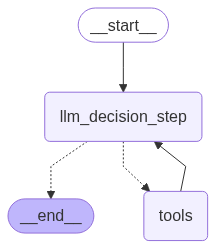

In [69]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [75]:
#Ask the question
message = [HumanMessage(content = "what is 2 times of MS Dhoni Age?")]
result_1 = react_graph .invoke({"messages":message})
result_1 

{'messages': [HumanMessage(content='what is 2 times of MS Dhoni Age?', additional_kwargs={}, response_metadata={}, id='e7be04fa-3cff-4705-a157-c660e33a8130'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, so the user is asking, "what is 2 times of MS Dhoni Age?" I need to figure out how to respond to this. First, I should break down the query. They want to multiply MS Dhoni\'s age by 2. \n\nI know that MS Dhoni is a well-known cricketer, so his age is a piece of information that might change over time. Since I don\'t have real-time data, I might need to look up his current age. But wait, I have access to a tool called DuckDuckGo Search which can help me find the most recent information.\n\nSo, the first step is to use the DuckDuckGo Search tool to find MS Dhoni\'s current age. I\'ll set up a search query for that. Once I have his age, the next step is to multiply it by 2. For that, I can use the multiply function provided in the tools.\n\nI should make sure to 

In [ ]:
### Stream Output
for output in react_graph .stream({"messages":message }):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("----"*10)
        print(value)
        print("\n")

here is output from llm_decision_step
----------------------------------------
{'messages': [AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, so the user is asking, "what is 2 times of MS Dhoni Age?" I need to figure out how to respond to this. First, I should break down the query. They want to multiply MS Dhoni\'s age by 2. \n\nI know that MS Dhoni is a well-known cricketer, so his age is a piece of information that might change over time. Since I don\'t have real-time data, I might need to look up his current age. But wait, I have access to a tool called DuckDuckGo Search which can help me find the most recent information.\n\nSo, the first step is to use the DuckDuckGo Search tool to find MS Dhoni\'s current age. I\'ll set up a search query for that. Once I have his age, the next step is to multiply it by 2. For that, I can use the multiply function provided in the tools.\n\nI should make sure to handle the function calls correctly. First, call the DuckDuckGo Sear

In [80]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]
### Stream Output
for output in react_graph .stream({"messages":message }):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("----"*10)
        print(value)
        print("\n")

here is output from llm_decision_step
----------------------------------------
{'messages': [AIMessage(content='', additional_kwargs={'reasoning_content': "Alright, so I need to figure out how much Elon Musk's net worth is and then divide that number by 2. First, I don't have the exact figure off the top of my head, so I should probably look it up. I remember that his net worth fluctuates a lot because it's tied to the stock prices of the companies he's involved with, like Tesla and SpaceX.\n\nI'll start by using the DuckDuckGo search tool to find the most recent estimate of Elon Musk's net worth. Once I have that number, I'll need to divide it by 2. Since dividing by 2 is the same as finding half of the number, I can use the divide function for this. I should make sure that the number I get from the search is accurate and up-to-date because net worth can change rapidly.\n\nAfter obtaining the net worth, I'll input it into the divide function with 2 as the denominator. This will give m

In [ ]:
#The Content is '' , beacuse we neeeed to use the Good reasing tool or LLM - Finetuning 


In [81]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]
### Stream Output
for output in react_graph .stream({"messages":message }):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("----"*10)
        print(value)
        print("\n")

here is output from llm_decision_step
----------------------------------------
{'messages': [AIMessage(content='', additional_kwargs={'reasoning_content': "Okay, so I need to figure out the speed of light in meters per second and then multiply that by 10. First, I remember that the speed of light is a constant, but I'm not exactly sure of the exact number. I think it's around 300,000,000 m/s, but I'm not 100% certain. Maybe I should double-check that to make sure I have the right value.\n\nOnce I confirm the speed of light, the next step is to multiply it by 10. That seems straightforward, but I want to make sure I do it correctly. Multiplying by 10 should just add a zero at the end of the number, right? So if it's 299,792,458 m/s, multiplying by 10 would give me 2,997,924,580 m/s. But wait, I should verify if the speed of light is exactly 300,000,000 or if it's a bit less. I think it's actually approximately 299,792,458 m/s in a vacuum.\n\nSo, to be precise, I should use the exact fig

In [89]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]
response =  react_graph.invoke({"messages":message})
response["messages"][-1].content

'The speed of light is approximately 299,792,000 meters per second. When multiplied by 10, the result is 2,997,920,000 meters per second.\n\n**Step-by-Step Explanation:**\n\n1. **Identify the Speed of Light:**\n   - The speed of light in a vacuum is a well-known physical constant.\n   - It is approximately 299,792 kilometers per second.\n\n2. **Convert Kilometers to Meters:**\n   - Since 1 kilometer equals 1,000 meters, multiply the speed in kilometers by 1,000 to convert it to meters.\n   - Calculation: 299,792 km/s * 1,000 = 299,792,000 m/s.\n\n3. **Multiply by 10:**\n   - To find the speed of light multiplied by 10, take the value in meters per second and multiply it by 10.\n   - Calculation: 299,792,000 m/s * 10 = 2,997,920,000 m/s.\n\n**Final Answer:**\nThe speed of light is 299,792,000 meters per second, and when multiplied by 10, it equals 2,997,920,000 meters per second.'

In [83]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (me56fn69t)
 Call ID: me56fn69t
  Args:
    a: 299792000
    b: 10
================================= Tool Message =================================
Name: multiply

2997920000
================================== Ai Message ==================================

The speed of light in meters per second is approximately 299,792,000 m/s. When multiplied by 10, the result is 2,997,920,000 m/s.


### Finance Agentic AI WorkFlow

In [86]:
import yfinance as yf

In [91]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker) ##Method,
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

In [92]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $201.00.'

In [93]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $328.49.'

In [94]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000292E1FAEE80>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000292E1FAED40>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x00000292E1FAECA0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [95]:
tools = [add, multiply, divide, search,get_stock_price]

In [96]:
tools

[StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000292E1FAED40>),
 StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000292E1FAEE80>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x00000292E1FAECA0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [97]:
llm_with_tools = llm.bind_tools(tools)

In [98]:
response = llm_with_tools.invoke(
    "can you give me a latest stock price of adani greens?"
    )

In [ ]:
response.content #her, it give none in the content

''

In [100]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': 't2mg0bskc',
  'type': 'tool_call'}]

In [ ]:
#System Prompt
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)

#Function for the Node
def function_1(state:MessagesState):
    
    user_question = state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [ ]:
###Add the workflow
workflow = StateGraph(MessagesState)

##Add the NOde
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools)) #this is updated with the finance tool

##Add the Edge
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)

workflow.add_edge("tools", "llm_decision_step")

#compile it
react_graph2 = workflow.compile()

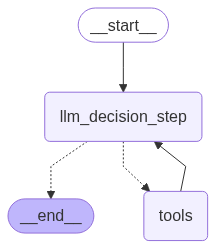

In [103]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [104]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (n3cfz62br)
 Call ID: n3cfz62br
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $201.00.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (0m0kbmnrx)
 Call ID: 0m0kbmnrx
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $201.00.
================================== Ai Message ==================================

The result of adding 1000 to the current stock price of Apple (AAPL) is:

**1201**


In [113]:
message = [HumanMessage(content="current stock value of Ashok Leyland Ltd")]
messages = react_graph2.invoke({"messages": message})

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

current stock value of Ashok Leyland Ltd
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (ax6qjdvb7)
 Call ID: ax6qjdvb7
  Args:
    ticker: ASHOKLEY.BO
================================= Tool Message =================================
Name: get_stock_price

The last closing price of ASHOKLEY.BO was $248.95.
================================== Ai Message ==================================

The last closing price of Ashok Leyland Ltd (ASHOKLEY.BO) was **$248.95**. This information is fetched from Yahoo Finance.


In [114]:
message = [HumanMessage(content="What is one stock value of Ashok Leyland Ltd and multiply the one stock value with 15?")]
### Stream Output
for output in react_graph2.stream({"messages":message }):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("----"*10)
        print(value)
        print("\n")

here is output from llm_decision_step
----------------------------------------
{'messages': [AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, so the user is asking for the value of one stock of Ashok Leyland Ltd and then to multiply that value by 15. Let me break this down step by step.\n\nFirst, I need to find the current stock price of Ashok Leyland Ltd. Since I have access to the Yahoo Finance tool, I can use the get_stock_price function with the ticker symbol "ASHOKLEY.BO" because that\'s the correct ticker for Ashok Leyland on Yahoo Finance.\n\nOnce I have the stock price, the next step is to multiply that value by 15. The multiply function is available, which takes two integers and returns their product. However, I should note that the stock price might be a float, so I need to ensure that the multiply function can handle it or if I need to convert it to an integer first.\n\nWait, looking back at the functions, the multiply function actually expects two intege

### Assigmnet 4:-

In [ ]:
# Assignment:
    
# AI Travel Agent & Expense Planner(Purpose: Trip planning for any city worldwide with Realtime data.")

# • Real-time weather information
# • Top attractions and activities
# • Hotel cost calculation (per day × total days)
# • Currency conversion to user's native currency
# • Complete itinerary generation
# • Total expense calculation
# • generate a summary of the entire output

# user_input
#   |
# search attraction and activity
# 1. search attracation
# 2. search restaurant
# 3. search activity
# 4. search transportation
#   |
# search weather forcasting
# 1. get current weather
# 2. get weather forcast
#   |
# search hotel costs
# 1. search hotel
# 2. estimate the hotel cost
# 3. budget_range
#   |
# calculate total cost
# 1. add
# 2. multiply
# 3. calculated total cost
# 4. calcualte the daily budget
#     | 
# currency_converion
# 1. get exchnage rate
# 2. convert currancy
#     | 
# Itinery generation
# 1. get day plan
# 2. crete full itinery
#     |
# create Trip Summary
#     |
# Retun complete traval plan

# Note: if you know the OOPS then design this entire system using object and class in modular fashion.


# deadline is till next friday 9PM IST


#  everyone you can submit the assignments in this form. MAke sure to have one GitHub link and put all the assignments there https://forms.gle/g8RZ4qx8yvNcih4B7    
    